# Application process consumption study
In this notebook, we study how PowerAPI and Scaphandre estimate consumption at the application process level.

## Import necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

from visualize import *
import seaborn as sns
import matplotlib.pyplot as plt

## Single process study

### Loading experiments

In [2]:
experiments_path = [
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-17_35_17',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-18_05_29',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-18_36_17',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-19_07_02',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-19_38_14',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-20_09_18',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-20_39_40',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-21_10_48',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-21_41_51',
    '3-solutions-compare-gemini-1.lyon.grid5000.fr-2022-03-31-22_12_51'
]

experiments_single_process = []

for experiment_path in experiments_path:
    experiments_single_process.append(parse_experiment("../results/%s" % experiment_path))

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes(experiments_single_process)

### Prepare data for plotting

In [3]:
# Get consumption information by benchmark
benchmarks_powerapi = convert_exp_into_benchmark_dataframes(experiments_single_process, 'PowerAPI' ,'powerapi', 30)
benchmarks_scaphandre = convert_exp_into_benchmark_dataframes(experiments_single_process, 'Scaphandre' ,'scaphandre', 30)

result_df_plots = get_powerapi_and_scaphandre_process_dfs(benchmarks_powerapi, benchmarks_scaphandre)
result_df_plots

,timestamp,benchmark,plot_name,value
0,0 days 00:00:00,EP NAS Benchmark,powerapi_rapl_cpu,140.195435
1,0 days 00:00:01,EP NAS Benchmark,powerapi_rapl_cpu,140.184052
2,0 days 00:00:02,EP NAS Benchmark,powerapi_rapl_cpu,140.191467
3,0 days 00:00:03,EP NAS Benchmark,powerapi_rapl_cpu,140.092896
4,0 days 00:00:04,EP NAS Benchmark,powerapi_rapl_cpu,140.222565
...,...,...,...,...
1805,0 days 00:02:45,MG NAS Benchmark,scaphandre_process_1_cpu,0.000000
1806,0 days 00:02:50,MG NAS Benchmark,scaphandre_process_1_cpu,0.000000
1807,0 days 00:02:55,MG NAS Benchmark,scaphandre_process_1_cpu,0.000000
1808,0 days 00:03:00,MG NAS Benchmark,scaphandre_process_1_cpu,0.000000


### Plot power profiles

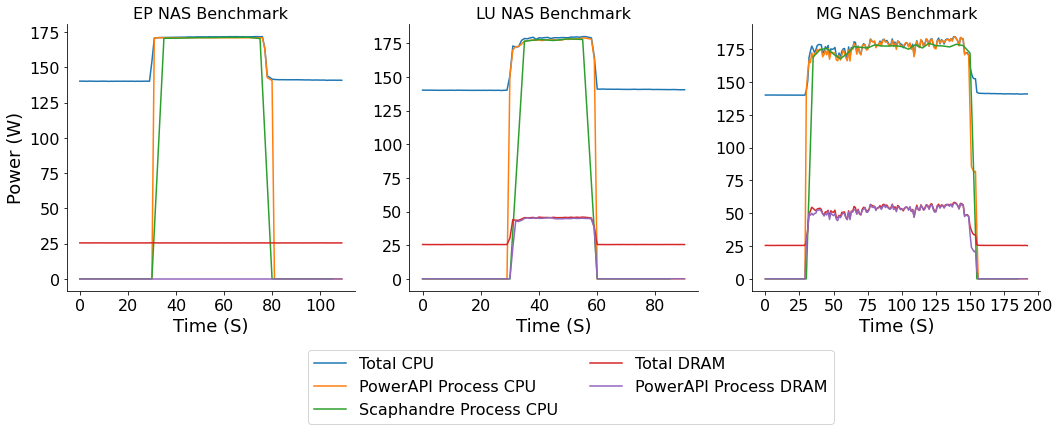

In [4]:
result_df_plots['timestamp_sec'] = result_df_plots['timestamp'].dt.total_seconds()

plt.rcParams.update({'font.size': 16})

sns.set_context(rc={"lines.linewidth": 1.5})

grid = sns.relplot(
    data=result_df_plots,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    hue_order=['powerapi_rapl_cpu', 'powerapi_process_1_cpu', 'scaphandre_process_1_cpu', 'powerapi_rapl_dram', 'powerapi_process_1_dram'],
    facet_kws={'sharex': False, 'sharey': False}
)
grid.set_titles(template='{col_name}')
grid.set_xlabels('Time (S)', fontsize="18")
grid.set_ylabels('Power (W)', fontsize="18")

# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['Total CPU', 'PowerAPI Process CPU', 'Scaphandre Process CPU', 'Total DRAM', 'PowerAPI Process DRAM']):
    t.set_text(l)

sns.move_legend(grid,
    "upper left",
    bbox_to_anchor=(0.24, 0.02),
    ncol=2,
    frameon=True
)

grid.savefig('../figures/process_estimation_with_rapl.pdf')
grid.savefig('../figures/process_estimation_with_rapl.png')

sns.reset_defaults()

## Parallel processes study

### 2 parallel EP benchmarks study

#### Load experiment results

In [5]:
experiments_path = [
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-01-23_32_36',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-01-23_42_12',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-01-23_51_44',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-02-00_01_16',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-02-00_10_49',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-02-00_20_22',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-02-00_29_58',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-02-00_39_33',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-02-00_49_13',
    '2-solutions-compare-2-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-02-00_58_49'
]

experiments_2_process = []

for experiment_path in experiments_path:
    experiment = parse_experiment("../results/%s" % experiment_path)
    experiments_2_process.append(experiment)

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes(experiments_2_process)

#### Prepare data for plotting

In [6]:
# Get consumption information by benchmark
benchmarks_powerapi_2_proc = convert_exp_into_benchmark_dataframes(experiments_2_process, 'PowerAPI' ,'powerapi', 10)
benchmarks_scaphandre_2_proc = convert_exp_into_benchmark_dataframes(experiments_2_process, 'Scaphandre' ,'scaphandre', 10)

result_df_plots_2_proc_same_cpu = get_powerapi_and_scaphandre_process_dfs(benchmarks_powerapi_2_proc, benchmarks_scaphandre_2_proc)

result_df_plots_2_proc_same_cpu

,timestamp,benchmark,plot_name,value
0,0 days 00:00:00,2 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,140.615631
1,0 days 00:00:01,2 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,140.689880
2,0 days 00:00:02,2 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,140.666534
3,0 days 00:00:03,2 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,140.688202
4,0 days 00:00:04,2 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,140.624298
...,...,...,...,...
817,0 days 00:01:35,2 Parallel EP NAS Benchmarks,scaphandre_process_2_cpu,86.397773
818,0 days 00:01:40,2 Parallel EP NAS Benchmarks,scaphandre_process_2_cpu,86.188423
819,0 days 00:01:45,2 Parallel EP NAS Benchmarks,scaphandre_process_2_cpu,64.879527
820,0 days 00:01:50,2 Parallel EP NAS Benchmarks,scaphandre_process_2_cpu,0.000000


#### Plot power profiles

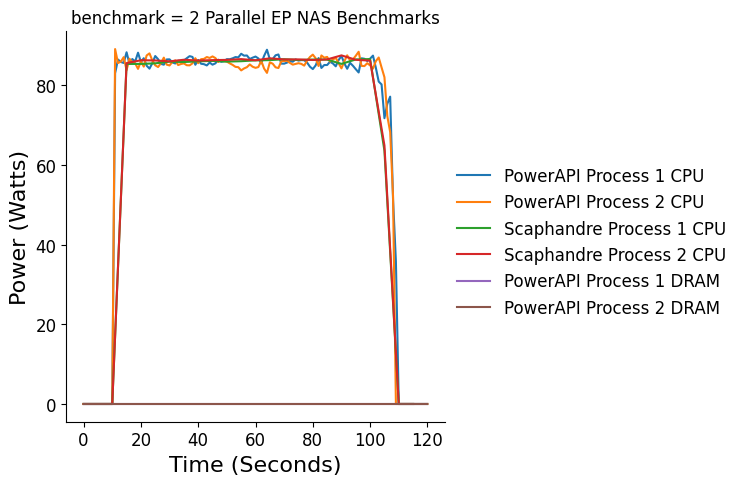

In [7]:
plt.rcParams.update({'font.size': 12})

result_df_plots_2_proc_same_cpu['timestamp_sec'] = result_df_plots_2_proc_same_cpu['timestamp'].dt.total_seconds()

grid = sns.relplot(
    data=result_df_plots_2_proc_same_cpu,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': False},
    hue_order=["powerapi_process_1_cpu", "powerapi_process_2_cpu", "scaphandre_process_1_cpu", "scaphandre_process_2_cpu", "powerapi_process_1_dram", "powerapi_process_2_dram"]
)

grid.set_xlabels('Time (Seconds)', fontsize="16")
grid.set_ylabels('Power (Watts)', fontsize="16")

# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['PowerAPI Process 1 CPU', 'PowerAPI Process 2 CPU', 'Scaphandre Process 1 CPU', 'Scaphandre Process 2 CPU', 'PowerAPI Process 1 DRAM', 'PowerAPI Process 2 DRAM']):
    t.set_text(l)

### 2 parallel MG benchmarks study

#### Load experiment results

In [8]:
experiments_path_ram = [
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-21_09_11',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-21_24_40',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-21_39_34',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-21_54_19',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-22_09_16',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-22_23_50',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-22_38_29',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-22_53_03',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-23_08_06',
    '2-solutions-compare-2-parallel-same-ram-gemini-1.lyon.grid5000.fr-2022-04-01-23_23_03'
]

experiments_2_process_ram = []

for experiment_path in experiments_path_ram:
    experiment = parse_experiment("../results/%s" % experiment_path)
    experiments_2_process_ram.append(experiment)

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes(experiments_2_process_ram)

#### Prepare data for plotting

In [9]:
# Get consumption information by benchmark
benchmarks_powerapi_2_proc_ram = convert_exp_into_benchmark_dataframes(experiments_2_process_ram, 'PowerAPI' ,'powerapi', 30)
benchmarks_scaphandre_2_proc_ram = convert_exp_into_benchmark_dataframes(experiments_2_process_ram, 'Scaphandre' ,'scaphandre', 30)

result_df_plots_2_proc_ram = get_powerapi_and_scaphandre_process_dfs(benchmarks_powerapi_2_proc_ram, benchmarks_scaphandre_2_proc_ram)
result_df_plots_2_proc_ram

,timestamp,benchmark,plot_name,value
0,0 days 00:00:00,2 Parallel MG NAS Benchmarks,powerapi_rapl_cpu,141.057129
1,0 days 00:00:01,2 Parallel MG NAS Benchmarks,powerapi_rapl_cpu,141.084412
2,0 days 00:00:02,2 Parallel MG NAS Benchmarks,powerapi_rapl_cpu,141.103516
3,0 days 00:00:03,2 Parallel MG NAS Benchmarks,powerapi_rapl_cpu,141.037537
4,0 days 00:00:04,2 Parallel MG NAS Benchmarks,powerapi_rapl_cpu,141.004395
...,...,...,...,...
2277,0 days 00:05:15,2 Parallel MG NAS Benchmarks,scaphandre_process_2_cpu,0.000000
2278,0 days 00:05:20,2 Parallel MG NAS Benchmarks,scaphandre_process_2_cpu,0.000000
2279,0 days 00:05:25,2 Parallel MG NAS Benchmarks,scaphandre_process_2_cpu,0.000000
2280,0 days 00:05:30,2 Parallel MG NAS Benchmarks,scaphandre_process_2_cpu,0.000000


#### Plot power profiles

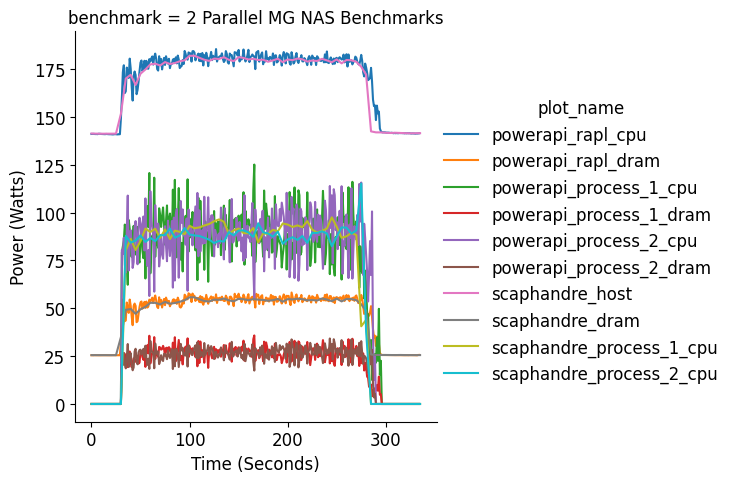

In [10]:
result_df_plots_2_proc_ram['timestamp_sec'] = result_df_plots_2_proc_ram['timestamp'].dt.total_seconds()
grid = sns.relplot(
    data=result_df_plots_2_proc_ram,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': True}
)

grid.set_xlabels('Time (Seconds)')
grid.set_ylabels('Power (Watts)')

#### Plot PowerAPI power profiles

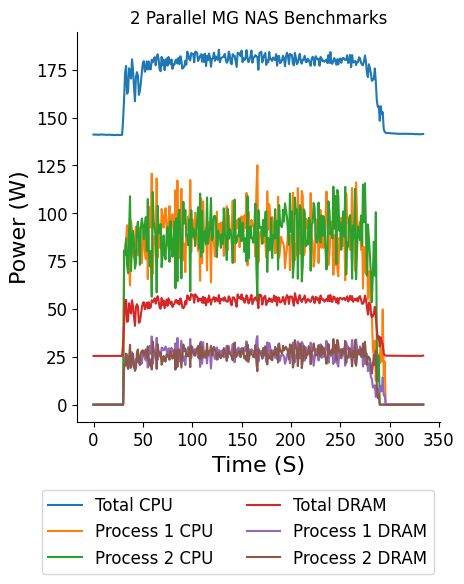

In [11]:
result_df_plots_2_proc_ram['timestamp_sec'] = result_df_plots_2_proc_ram['timestamp'].dt.total_seconds()

plt.rcParams.update({'font.size': 12})

grid = sns.relplot(
    data=result_df_plots_2_proc_ram,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': False},
    hue_order=["powerapi_rapl_cpu", "powerapi_process_1_cpu", "powerapi_process_2_cpu", "powerapi_rapl_dram", "powerapi_process_1_dram", "powerapi_process_2_dram"],
)

grid.set_titles(template='{col_name}')
grid.set_xlabels('Time (S)', fontsize='16')
grid.set_ylabels('Power (W)', fontsize='16')

# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['Total CPU', 'Process 1 CPU', 'Process 2 CPU', 'Total DRAM', 'Process 1 DRAM', 'Process 2 DRAM']):
    t.set_text(l)

sns.move_legend(grid,
    "upper left",
    bbox_to_anchor=(0.11, 0.02),
    ncol=2,
    frameon=True
)

grid.savefig('../figures/powerapi_2_mg_process.pdf')
grid.savefig('../figures/powerapi_2_mg_process.png')

sns.reset_defaults()

#### Plot Scaphandre power profiles

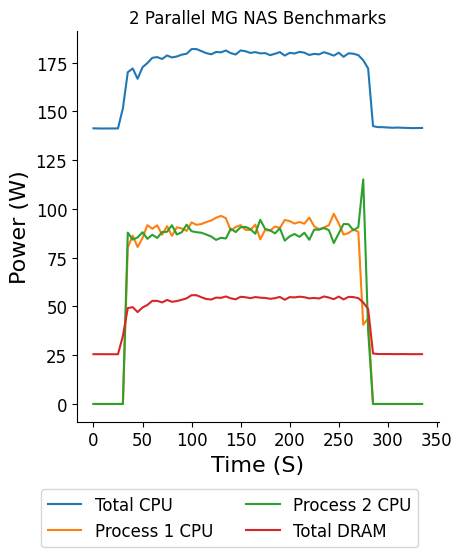

In [12]:
result_df_plots_2_proc_ram['timestamp_sec'] = result_df_plots_2_proc_ram['timestamp'].dt.total_seconds()

plt.rcParams.update({'font.size': 12})

grid = sns.relplot(
    data=result_df_plots_2_proc_ram,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': False},
    hue_order=["scaphandre_host", "scaphandre_process_1_cpu", "scaphandre_process_2_cpu", "scaphandre_dram"],
)

grid.set_titles(template='{col_name}')
grid.set_xlabels('Time (S)', fontsize='16')
grid.set_ylabels('Power (W)', fontsize='16')

# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['Total CPU', 'Process 1 CPU', 'Process 2 CPU', 'Total DRAM']):
    t.set_text(l)

sns.move_legend(grid,
    "upper left",
    bbox_to_anchor=(0.11, 0.02),
    ncol=2,
    frameon=True
)

grid.savefig('../figures/scaphandre_2_mg_process.pdf')
grid.savefig('../figures/scaphandre_2_mg_process.png')

sns.reset_defaults()

### 2 different benchmarks launched in parallel (EP and LU)

#### Load experiment results

In [13]:
experiments_path = [
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-11_20_57',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-11_33_17',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-11_44_08',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-11_55_05',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-12_06_00',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-12_16_54',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-12_27_53',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-12_38_53',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-12_49_52',
    '2-solutions-compare-parallel-different-gemini-1.lyon.grid5000.fr-2022-04-05-13_00_53'
]

experiments_2_process_different = []

for experiment_path in experiments_path:
    experiment = parse_experiment("../results/%s" % experiment_path)
    experiments_2_process_different.append(experiment)

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes(experiments_2_process_different)

#### Prepare data for plotting

In [14]:
# Get consumption information by benchmark
benchmarks_powerapi_2_proc = convert_exp_into_benchmark_dataframes(experiments_2_process_different, 'PowerAPI' ,'powerapi', 10)
benchmarks_scaphandre_2_proc = convert_exp_into_benchmark_dataframes(experiments_2_process_different, 'Scaphandre' ,'scaphandre', 10)

result_df_plots_2_proc_different_1 = get_powerapi_and_scaphandre_process_dfs(benchmarks_powerapi_2_proc, benchmarks_scaphandre_2_proc)

result_df_plots_2_proc_different_1

,timestamp,benchmark,plot_name,value
0,0 days 00:00:00,1 EP et 1 LU parallel NAS Benchmarks,powerapi_rapl_cpu,141.374634
1,0 days 00:00:01,1 EP et 1 LU parallel NAS Benchmarks,powerapi_rapl_cpu,141.400421
2,0 days 00:00:02,1 EP et 1 LU parallel NAS Benchmarks,powerapi_rapl_cpu,141.426331
3,0 days 00:00:03,1 EP et 1 LU parallel NAS Benchmarks,powerapi_rapl_cpu,141.529144
4,0 days 00:00:04,1 EP et 1 LU parallel NAS Benchmarks,powerapi_rapl_cpu,141.469391
...,...,...,...,...
1255,0 days 00:02:00,1 EP et 1 LU parallel NAS Benchmarks,scaphandre_process_2_cpu,178.201458
1256,0 days 00:02:05,1 EP et 1 LU parallel NAS Benchmarks,scaphandre_process_2_cpu,178.364808
1257,0 days 00:02:10,1 EP et 1 LU parallel NAS Benchmarks,scaphandre_process_2_cpu,176.603993
1258,0 days 00:02:15,1 EP et 1 LU parallel NAS Benchmarks,scaphandre_process_2_cpu,0.000000


#### Plot power profiles

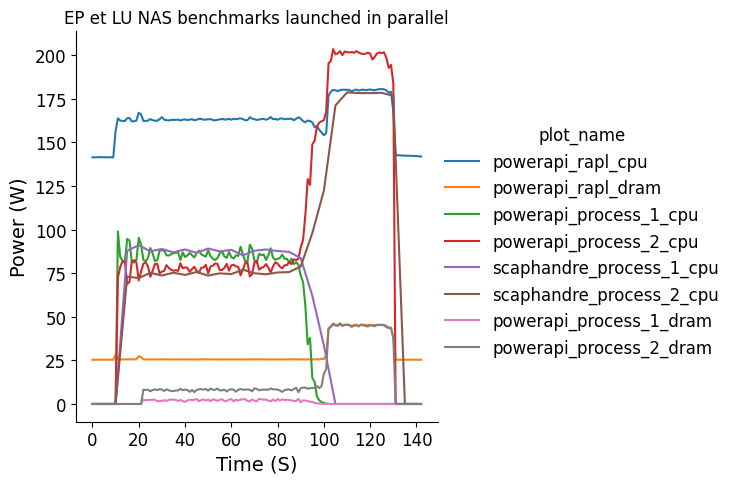

In [15]:
plt.rcParams.update({'font.size': 12})

result_df_plots_2_proc_different_1['timestamp_sec'] = result_df_plots_2_proc_different_1['timestamp'].dt.total_seconds()
result_df_plots_2_proc_different_1['benchmark'] = 'EP et LU NAS benchmarks launched in parallel'

grid = sns.relplot(
    data=result_df_plots_2_proc_different_1,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': True},
    hue_order=["powerapi_rapl_cpu", "powerapi_rapl_dram", "powerapi_process_1_cpu", "powerapi_process_2_cpu", "scaphandre_process_1_cpu", "scaphandre_process_2_cpu", "powerapi_process_1_dram", "powerapi_process_2_dram"],
)
grid.set_titles(template='{col_name}')
grid.set_xlabels('Time (S)', fontsize="14")
grid.set_ylabels('Power (W)', fontsize="14")

sns.reset_defaults()

#### Plot power profile given by PowerAPI 

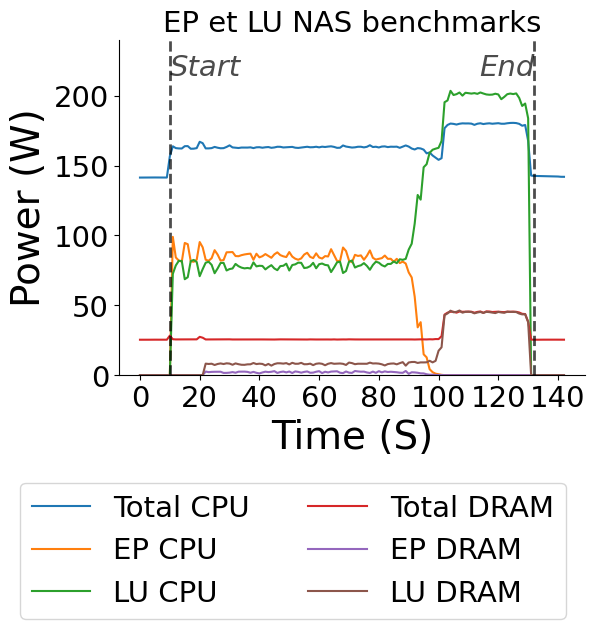

In [16]:
plt.rcParams.update({'font.size': 21})

result_df_plots_2_proc_different_1['timestamp_sec'] = result_df_plots_2_proc_different_1['timestamp'].dt.total_seconds()
result_df_plots_2_proc_different_1['benchmark'] = 'EP et LU NAS benchmarks'

grid = sns.relplot(
    data=result_df_plots_2_proc_different_1,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': True},
    hue_order=["powerapi_rapl_cpu", "powerapi_process_1_cpu", "powerapi_process_2_cpu",  "powerapi_rapl_dram", "powerapi_process_1_dram", "powerapi_process_2_dram"],
    height=5,
    aspect=1.4
)
grid.set_titles(template='{col_name}')
grid.set_xlabels('Time (S)', fontsize="28")
grid.set_ylabels('Power (W)', fontsize="28")

# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['Total CPU', 'EP CPU', 'LU CPU', 'Total DRAM', 'EP DRAM', 'LU DRAM']):
    t.set_text(l)

sns.move_legend(grid,
    "upper left",
    bbox_to_anchor=(0.091, 0.02),
    ncol=2,
    frameon=True
)

grid.set(ylim=(0, 240))

# Calulate start and end time of benchmarks
min_timestamp_df = result_df_plots_2_proc_different_1[result_df_plots_2_proc_different_1['plot_name'] == 'powerapi_rapl_cpu'].groupby(['timestamp','benchmark','plot_name'], as_index=False)['value'].min()
min_timestamp_df = min_timestamp_df.groupby(['benchmark','plot_name'], as_index=False)['timestamp'].min()
min_timestamp_df['start'] = min_timestamp_df['timestamp'].dt.total_seconds() + 10

max_timestamp_df = result_df_plots_2_proc_different_1[result_df_plots_2_proc_different_1['plot_name'] == 'powerapi_rapl_cpu'].groupby(['timestamp','benchmark','plot_name'], as_index=False)['value'].max()
max_timestamp_df = max_timestamp_df.groupby(['benchmark','plot_name'], as_index=False)['timestamp'].max()
max_timestamp_df['end'] = max_timestamp_df['timestamp'].dt.total_seconds() - 10

# Add start and end vertical lines to plot
for n, ax in enumerate(grid.axes.flat):
    ax.axvline(min_timestamp_df['start'].values[n], 0, 1250, linewidth=2, color='black', alpha=0.7, linestyle='--')
    ax.axvline(max_timestamp_df['end'].values[n], 0, 1250, linewidth=2, color='black', alpha=0.7, linestyle='--')
    ax.text(min_timestamp_df['start'].values[n], 230, "Start", fontsize=21, ha='left', va='top', alpha=0.7, fontstyle= 'italic')
    ax.text(max_timestamp_df['end'].values[n], 230, "End", fontsize=21, ha='right', va='top', alpha=0.7, fontstyle= 'italic')

# Save figures
grid.savefig('../figures/ep_lu_powerapi.pdf')
grid.savefig('../figures/ep_lu_powerapi.png')

sns.reset_defaults()

### 2 different benchmarks launched in parallel (MG and IS)

#### Load experiment results

In [17]:
experiments_path_ram_different = [
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-17_34_21',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-17_45_59',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-17_57_39',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-18_09_32',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-18_21_19',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-18_33_01',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-18_44_25',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-18_56_09',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-19_07_55',
    '2-solutions-compare-2-parallel-different-ram-gemini-1.lyon.grid5000.fr-2022-04-01-19_19_43'
]

experiments_2_process_ram_different = []

for experiment_path in experiments_path_ram_different:
    experiment = parse_experiment("../results/%s" % experiment_path)
    experiments_2_process_ram_different.append(experiment)

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes(experiments_2_process_ram_different)

#### Prepare data for plotting

In [18]:
# Get consumption information by benchmark
benchmarks_powerapi_2_proc_ram = convert_exp_into_benchmark_dataframes(experiments_2_process_ram_different, 'PowerAPI' ,'powerapi', 30)
benchmarks_scaphandre_2_proc_ram = convert_exp_into_benchmark_dataframes(experiments_2_process_ram_different, 'Scaphandre' ,'scaphandre', 30)

result_df_plots_2_proc_ram = get_powerapi_and_scaphandre_process_dfs(benchmarks_powerapi_2_proc_ram, benchmarks_scaphandre_2_proc_ram)
result_df_plots_2_proc_ram

,timestamp,benchmark,plot_name,value
0,0 days 00:00:00,MG and IS NAS Benchmarks Launched in Parallel,powerapi_rapl_cpu,141.280090
1,0 days 00:00:01,MG and IS NAS Benchmarks Launched in Parallel,powerapi_rapl_cpu,141.325775
2,0 days 00:00:02,MG and IS NAS Benchmarks Launched in Parallel,powerapi_rapl_cpu,141.305817
3,0 days 00:00:03,MG and IS NAS Benchmarks Launched in Parallel,powerapi_rapl_cpu,141.238098
4,0 days 00:00:04,MG and IS NAS Benchmarks Launched in Parallel,powerapi_rapl_cpu,141.274017
...,...,...,...,...
1617,0 days 00:03:30,MG and IS NAS Benchmarks Launched in Parallel,scaphandre_process_2_cpu,0.000000
1618,0 days 00:03:35,MG and IS NAS Benchmarks Launched in Parallel,scaphandre_process_2_cpu,0.000000
1619,0 days 00:03:40,MG and IS NAS Benchmarks Launched in Parallel,scaphandre_process_2_cpu,0.000000
1620,0 days 00:03:45,MG and IS NAS Benchmarks Launched in Parallel,scaphandre_process_2_cpu,0.000000


#### Plot power profiles

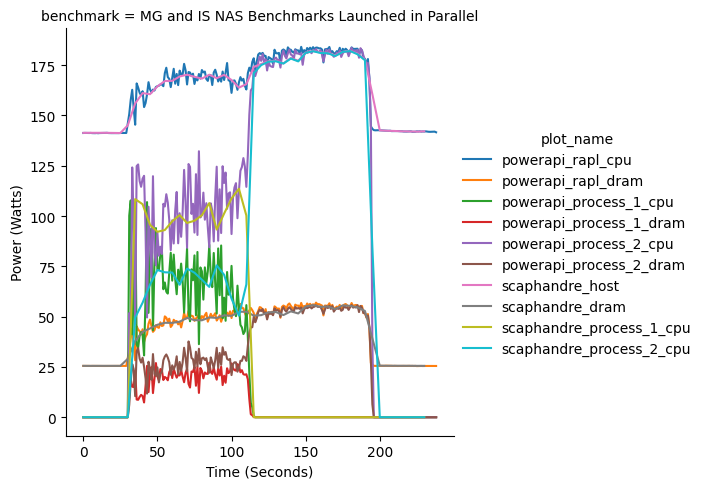

In [19]:
result_df_plots_2_proc_ram['timestamp_sec'] = result_df_plots_2_proc_ram['timestamp'].dt.total_seconds()
grid = sns.relplot(
    data=result_df_plots_2_proc_ram,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': True}
)

grid.set_xlabels('Time (Seconds)')
grid.set_ylabels('Power (Watts)')

#### Plot CPU power profiles

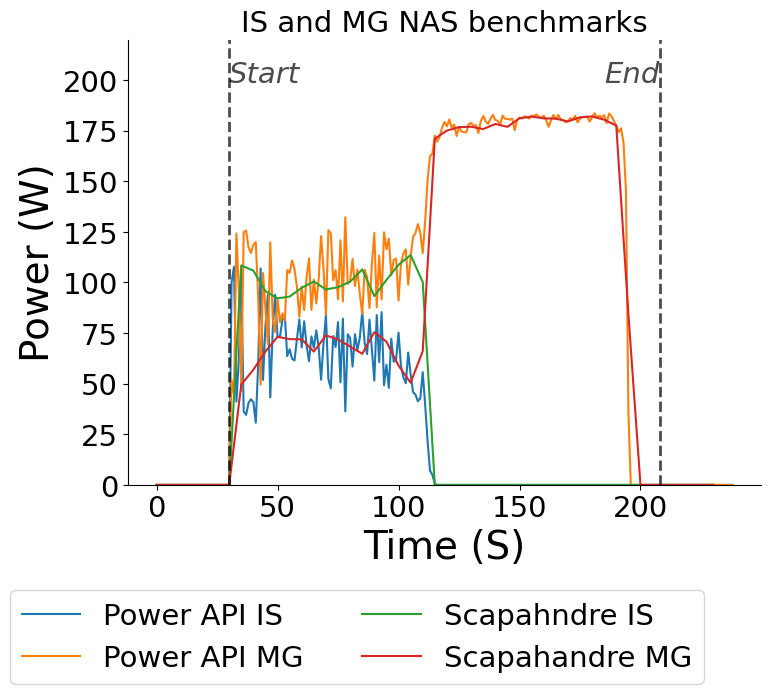

In [20]:
plt.rcParams.update({'font.size': 21})

result_df_plots_2_proc_ram['timestamp_sec'] = result_df_plots_2_proc_ram['timestamp'].dt.total_seconds()
result_df_plots_2_proc_ram['benchmark'] = 'IS and MG NAS benchmarks'

grid = sns.relplot(
    data=result_df_plots_2_proc_ram,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': True},
    hue_order=["powerapi_process_1_cpu", "powerapi_process_2_cpu", "scaphandre_process_1_cpu", "scaphandre_process_2_cpu"],
    height=6.1,
    aspect=1.4)
grid.set_titles(template='{col_name}')
grid.set_xlabels('Time (S)', fontsize="28")
grid.set_ylabels('Power (W)', fontsize="28")

# Change legend texts
grid.legend.set_title(None)
for t, l in zip(grid.legend.texts, ['Power API IS', 'Power API MG', 'Scapahndre IS', 'Scapahandre MG']):
    t.set_text(l)

sns.move_legend(grid,
    "upper left",
    bbox_to_anchor=(0.055, 0.02),
    ncol=2,
    frameon=True
)

grid.set(ylim=(0, 220))

# Calulate start and end time of benchmarks
min_timestamp_df = result_df_plots_2_proc_ram[result_df_plots_2_proc_ram['plot_name'] == 'powerapi_process_1_cpu'].groupby(['timestamp','benchmark','plot_name'], as_index=False)['value'].min()
min_timestamp_df = min_timestamp_df.groupby(['benchmark','plot_name'], as_index=False)['timestamp'].min()
min_timestamp_df['start'] = min_timestamp_df['timestamp'].dt.total_seconds() + 30

max_timestamp_df = result_df_plots_2_proc_ram[result_df_plots_2_proc_ram['plot_name'] == 'powerapi_process_1_cpu'].groupby(['timestamp','benchmark','plot_name'], as_index=False)['value'].max()
max_timestamp_df = max_timestamp_df.groupby(['benchmark','plot_name'], as_index=False)['timestamp'].max()
max_timestamp_df['end'] = max_timestamp_df['timestamp'].dt.total_seconds() - 30

# Add start and end vertical lines to plot
for n, ax in enumerate(grid.axes.flat):
    ax.axvline(min_timestamp_df['start'].values[n], 0, 1250, linewidth=2, color='black', alpha=0.7, linestyle='--')
    ax.axvline(max_timestamp_df['end'].values[n], 0, 1250, linewidth=2, color='black', alpha=0.7, linestyle='--')
    ax.text(min_timestamp_df['start'].values[n], 210, "Start", fontsize=21, ha='left', va='top', alpha=0.7, fontstyle= 'italic')
    ax.text(max_timestamp_df['end'].values[n], 210, "End", fontsize=21, ha='right', va='top', alpha=0.7, fontstyle= 'italic')

# Save figures
grid.savefig('../figures/is_mg_powerapi_scaphandre_cpu.pdf')
grid.savefig('../figures/is_mg_powerapi_scaphandre_cpu.png')
sns.reset_defaults()

### 3 parallel EP benchmarks study

#### Load experiment results

In [21]:
experiments_path = [
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-04-14_47_45',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-04-14_58_52',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-04-15_09_59',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-04-15_21_04',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-04-15_32_19',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-04-15_43_32',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-04-15_54_45',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-05-09_05_58',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-05-09_17_37',
    '2-solutions-compare-3-parallel-same-gemini-1.lyon.grid5000.fr-2022-04-05-09_29_16'
]

experiments_3_process = []

for experiment_path in experiments_path:
    experiment = parse_experiment("../results/%s" % experiment_path)
    # If threads experiments add postfix
    experiments_3_process.append(experiment)

# Additional processing is required for Scaphandre dataframes
# Scaphandre by component result dataframes will be joined into a single dataframe
process_scaphandre_dataframes(experiments_3_process)

#### Prepare data for plotting

In [22]:
# Get consumption information by benchmark
benchmarks_powerapi_3_proc = convert_exp_into_benchmark_dataframes(experiments_3_process, 'PowerAPI' ,'powerapi', 10)
benchmarks_scaphandre_3_proc = convert_exp_into_benchmark_dataframes(experiments_3_process, 'Scaphandre' ,'scaphandre', 10)

result_df_plots_3_proc = get_powerapi_and_scaphandre_process_dfs(benchmarks_powerapi_3_proc, benchmarks_scaphandre_3_proc)
result_df_plots_3_proc

,timestamp,benchmark,plot_name,value
0,0 days 00:00:00,3 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.329742
1,0 days 00:00:01,3 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.372223
2,0 days 00:00:02,3 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.338959
3,0 days 00:00:03,3 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.355774
4,0 days 00:00:04,3 Parallel EP NAS Benchmarks,powerapi_rapl_cpu,141.368530
...,...,...,...,...
1496,0 days 00:02:20,3 Parallel EP NAS Benchmarks,scaphandre_process_3_cpu,58.028540
1497,0 days 00:02:25,3 Parallel EP NAS Benchmarks,scaphandre_process_3_cpu,59.268391
1498,0 days 00:02:30,3 Parallel EP NAS Benchmarks,scaphandre_process_3_cpu,60.062455
1499,0 days 00:02:35,3 Parallel EP NAS Benchmarks,scaphandre_process_3_cpu,0.000000


#### Plot power profiles

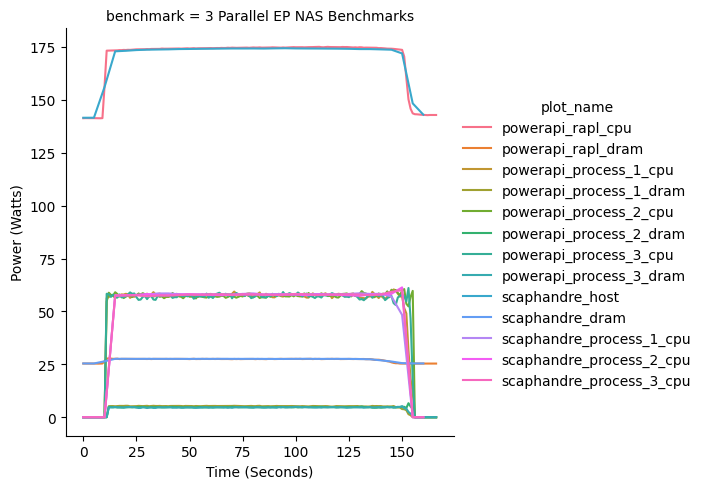

In [23]:
result_df_plots_3_proc['timestamp_sec'] = result_df_plots_3_proc['timestamp'].dt.total_seconds()

grid = sns.relplot(
    data=result_df_plots_3_proc,
    x="timestamp_sec", y="value",
    hue="plot_name", col="benchmark",
    kind="line",
    facet_kws={'sharex': False, 'sharey': True},
)

grid.set_xlabels('Time (Seconds)')
grid.set_ylabels('Power (Watts)')